In [45]:
from qiskit.visualization import *
from qiskit import *

import math
import numpy as np


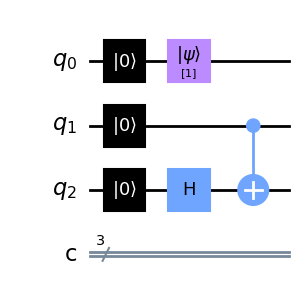

In [52]:
message = [1/math.sqrt(2),1/math.sqrt(2)]

qc = QuantumCircuit(3,3) #2 for bell states and one quantum info
qc.reset(range(3))

qc.initialize(1,0) #second qubit as 0.

#chosen bell state: phi+
qc.h(2)

qc.cnot(1,2)

#q1 and q2 generate the common bell basis and q0 is the message qubit
#q1 : alice's bit, q2: bob's

qc.draw('mpl')

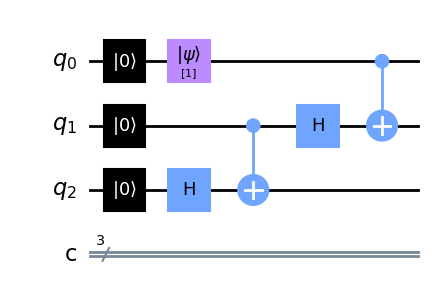

In [47]:
qc.h(1)
qc.cnot(0,1)

qc.draw('mpl')

In [48]:
qc.measure([0,1],[0,1]) #first [0,1] specifies the qubits to be measured and the next 0,1 specifies the classical bits where these will be stored.
qc.draw('mpl')

qc.barrier()

#we have secluded the Bob's bit and are just measuring alice's and the message's. Bob's bit is in the form of the message (read wiki
#article on quantum teleportation)

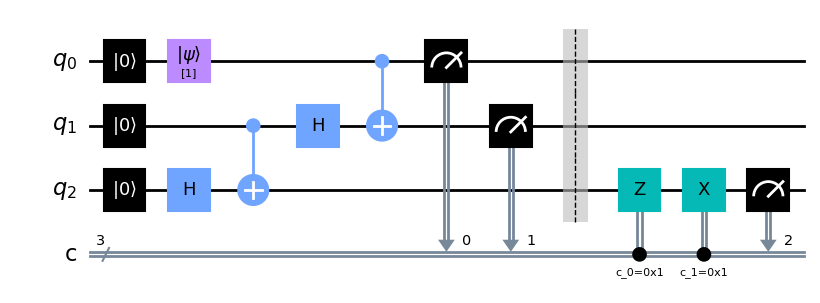

In [49]:
qc.z(2).c_if(0,1) 
qc.x(2).c_if(1,1) 

qc.measure(2,2)

qc.draw('mpl')

['111', '001', '101', '001', '001', '101', '101', '011', '011', '111', '011', '001', '101', '001', '011', '111', '111', '001', '101', '011']


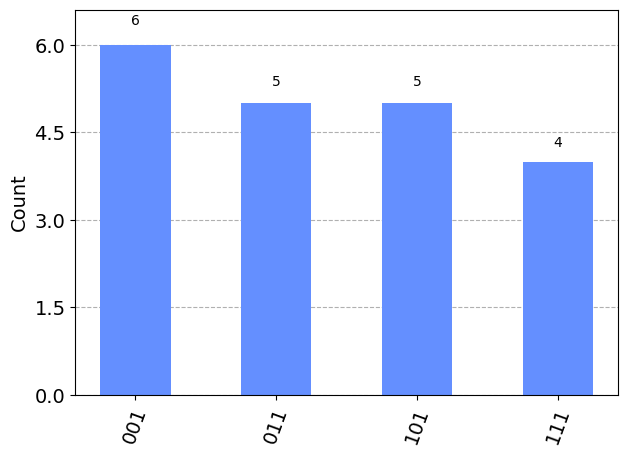

In [51]:
sim = Aer.get_backend('aer_simulator')
res = execute(qc,backend=sim,shots=20,memory=True).result()

final_message = res.get_memory()

# display(array_to_latex(final_message))
print(final_message)

plot_histogram(res.get_counts()) #this is in c2c1c0 order. Notice how c0 = 1 always (as we wanted to transfer |1>) and c1c0 are never 00 or 10